# Plot cross-sections used in these models

This plots the cross-sections contained in the *edge_files* folder, useful for visualizing the available cross-sections and structure.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import astropy.units as u
from astropy.io import fits

%matplotlib inline

## ISMdust

In [2]:
sil_file = "edge_files/silicate_xs.fits"
sil_data = fits.open(sil_file)[1].data

gra_file = "edge_files/graphite_xs.fits"
gra_data = fits.open(gra_file)[1].data

In [3]:
def plot_all_xsect(ax, data):
    ener = data['energy']
    abso = data['abs']
    scat = data['sca']
    exti = data['ext']
    ax.plot(ener, exti, color='k', label='Extinction')
    ax.plot(ener, abso, color='r', ls=':', label='Absorption')
    ax.plot(ener, scat, color='r', ls='--', label='Scattering')
    ax.legend(loc='upper right')

Text(0.5,1,'Silicate')

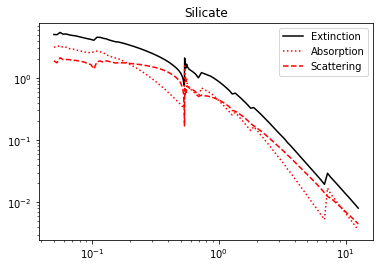

In [4]:
ax = plt.subplot(111)
plot_all_xsect(ax, sil_data)
plt.loglog()
ax.set_title('Silicate')

Text(0.5,1,'Graphite')

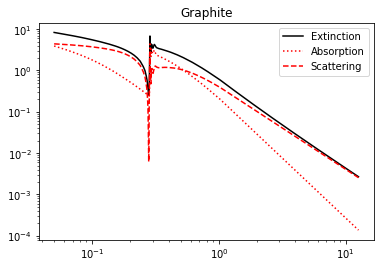

In [5]:
ax = plt.subplot(111)
plot_all_xsect(ax, gra_data)
plt.loglog()
ax.set_title('Graphite')

** Examine the master fits file **

In [6]:
master_file = "edge_files/xs_ext_grid.fits"
master_data = fits.open(master_file)[1].data

In [7]:
master_data.columns

ColDefs(
    name = 'energy'; format = 'E'
    name = 'sil_ext'; format = 'E'
    name = 'gra_ext'; format = 'E'
)

In [8]:
energy = master_data['energy'] * u.eV
sil_ext = master_data['sil_ext']
gra_ext = master_data['gra_ext']

Text(0,0.5,'$\\tau_{ext}$ ($Md / 10^{-4}$ g cm$^{-2}$)')

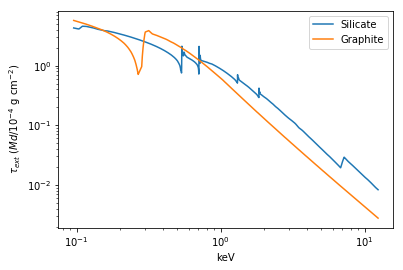

In [9]:
plt.plot(energy.to('keV'), sil_ext, label='Silicate')
plt.plot(energy.to('keV'), gra_ext, label='Graphite')
plt.loglog()
plt.legend(loc='upper right')
plt.xlabel('keV')
plt.ylabel(r'$\tau_{ext}$ ($Md / 10^{-4}$ g cm$^{-2}$)')